# Manipulation de la librairie networkx

In [21]:
class Protein:
    def __init__(self, uniprotID):
        self.ID = uniprotID
    def __hash__(self):
        return hash(self.ID)
    def __repr__(self):
        return self.ID

P0A8M3 P02358
P0A8M3 P02358
P0A8M3 P02358


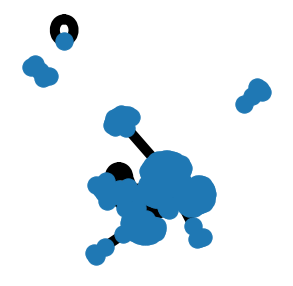

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()

fig, ax = plt.subplots(figsize=(5, 5))

mitab_protein = {}
with open('../proteins.mitab', "r") as fp:
    for l in fp:
        (idA, idB) = l.split("\t")[0:2]
        (idA, idB) = (idA, idB) if idA > idB else (idB, idA)
        if not idA.startswith("uniprotkb:") or not idB.startswith("uniprotkb:"):
            continue
        idA = idA.replace("uniprotkb:", "")
        idB = idB.replace("uniprotkb:", "")
        
        if idA not in mitab_protein:
            mitab_protein[idA] = Protein(idA)
        if idB not in mitab_protein:
            mitab_protein[idB] = Protein(idB)
            
        proteinA  = mitab_protein[idA]
        proteinB  = mitab_protein[idB]
        
        if not G.has_edge(proteinA, proteinB):
            G.add_edge(proteinA, proteinB, count=0)
        
        G[proteinA][proteinB]['count'] += 1
    
nx.draw(G, width=10)#, pos, with_labels=True, node_color=['blue','blue','red'] , node_size=2000)

In [23]:
if G.has_edge('a', 'b'):
    G['a']['b']['value'] = 10
else :
    G.add_edge('a', 'b', value=5)

NodeView((P0A6X3, P02358, P0ACF8, P0AFG8, P0A6Y1, P36659, P62399, P30871, P06996, P0A8J8, P37095, P0A910, P69820, P15082, P0A8T7, P68739, P0A717, P0DMC7, P0ABH9, P0AA25, P02931, P76344, P0AAB8, P37765, P0A7E9, P64467, P0ABT2, P0A7Z4, P0ACG1, P0A850, P0A6W5, P0C054, P0A8V2, P0A6F5, P76506, P60785, P09996, P0A9Q1, P61175, P0AC65, P06610, P06612, P10408, P60624, P0A6Y8, P06710, P0A6X7, P0A912, P0A9K3, P15977, P37903, P0AGJ5, P03018, P0A8I5, P0A9Y6, P0ABB4, P0A6G7, P0A6Q6, P77768, P0A9X4, P0ABD5, P02924, P06616, P69791, P0A9A6, P60723, P16528, P69811, P0A6Z3, P75970, P0A8F8, P42630, P0ADZ0, P0A776, P75829, P77656, P42592, P13036, P27848, P05055, P0A940, P0ACN4, P0A6A8, P36979, P76502, P25522, P0AFG0, P00490, P69411, P25539, P32694, P0ACF0, P27253, P21599, P06971, P0AFZ3, P21499, P0AB74, P0A8V6, P0ACF4, P0A9K9, P0AAS7, P0AB28, P0AC69, P0AD21, P0AEU7, Q46793, P0A8A0, P0A905, P0A8G0, P0AG24, P37052, P0A799, P0A7V0, P0AF26, P0A707, P63228, P0AA39, P05847, P0ADH5, P32162, P08622, P0A814, P0ABS8

In [28]:
pA = mitab_protein["P0A6X3"]
pB = mitab_protein["P02358"]
print(G.has_edge("P0A6X3", "P02358"))
print(G.has_edge(pA, pB))

False
True


In [40]:
pA = mitab_protein["P0A8M3"]
pB = mitab_protein["P02358"]
G[pB][pA]

{'count': 3}

In [35]:
for e in G.edges:
    # e is a 2-uple of nodes
    print(G.get_edge_data(*e)) # same as G.get_edge_data(e[0], e[1])

{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}
{'count': 1}

## Construction de réseaux d'interactions à partir de données MITAB.

Le format (MITAB) stocke des paires de protéines en interaction. Dans ce format, chaque colonne porte une information spécifique.
Une description du format est disponible [ici](https://psicquic.github.io/MITAB27Format.html).
Les données d'interactions impliquant les protéines surreprésentées de l'expérience ont été obtenues depuis la base de données [Intact](https://www.ebi.ac.uk/intact/home).
Ces données sont mises à votre disposition dans le fichier `data/proteins.mitab`.

Vous extrairez du fichier les paires d'identifiants uniprot des protéines en interaction.

Ces paires de protéines constituent un réseau d'interaction protéine-protéine que vous allez dessiner à l'aide de la libraire [networkx](https://networkx.org/documentation/stable/reference).
Le code suivant vous est fourni à titre d'exemple.

```python
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()

fig, ax = plt.subplots(figsize=(8, 8))

G.add_edge('a', 'b')
G.add_edge('e', 'b')
G.add_edge('e', 'a')
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=['blue','blue','red'] , node_size=2000)
```


Les positions des noeuds sont paramétrables au travers de l'objet [layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html). Une fois une première représentation du réseau obtenue, affinez celle-ci afin de:

* Écrire les identifiants uniprot dans les noeuds du réseau.
* Faire du diamètre des noeuds une fonction du nombre de partenaires protéiques.
* Faire de la largeur des arêtes une fonction du nombre d'experiences (lignes MITAB) detectant cette interaction
* Colorier les arêtes soutenues par au moins une interaction de type physique entre proteines.


## Croisement des données d'interaction et de protéomique

En utilisant les données d'abondance du fichier `TCL_wt1.tsv`, essayez de modifier le rendu du réseau pour:
* colorier dans une couleur spécifique uniquement les protéines surabondantes dans l'expérience.
* N'afficher que les noeuds des protéines mesurées dans l'experience.
* Utiliser une échelle de couleur continue fonction de l'abondance pour colorier les noeuds.
* colorier les protéines appartenant à des classes GO communes.